In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv(r"C:\Users\navan\Desktop\NK\VS\py\Data Sets\Language detection\Language Detection.csv")

In [122]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [123]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [124]:
df.sample(5)

,Text,Language
5479,No tengo la libertad de decirlo.,Spanish
6771,velopdragen ordet suave har flere forskellige ...,Danish
8756,det är inte värt det jag personligen älskar fr...,Sweedish
7634,non so che giorno sia quando guardi questo vid...,Italian
1505,"മലയാളത്തില് ഇതുവരെ 1,46,395 ഔദ്യോഗിക വിക്കിപീ...",Malayalam


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [127]:
df.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [128]:
df.drop_duplicates(inplace=True)
df.describe()

,Text,Language
count,10271,10271
unique,10267,17
top,slår mig.,English
freq,2,1382


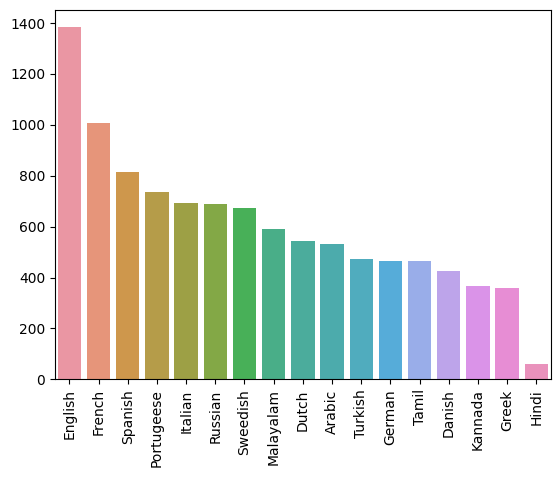

In [129]:
c = df['Language'].value_counts()

sns.barplot(x = c.index,y = c.values)
plt.xticks(rotation = 'vertical')
plt.show()

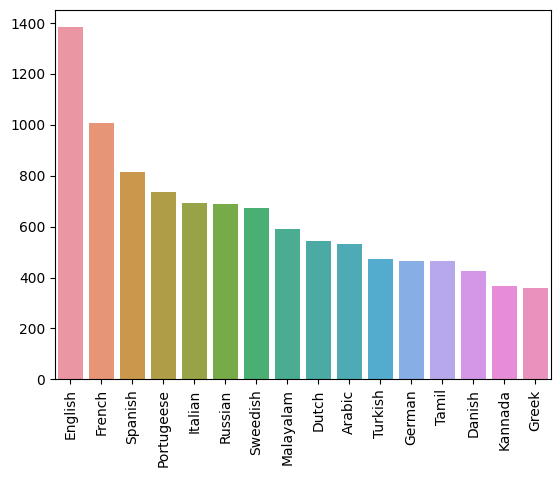

In [168]:
#removing hindi cause there is very less data on it
df = df[df['Language']!='Hindi']
c = df['Language'].value_counts()

sns.barplot(x = c.index,y = c.values)
plt.xticks(rotation = 'vertical')
plt.show()

In [131]:
import nltk

In [132]:
df['Nums_characters'] = df['Text'].apply(len)
df.sample(5)                                             

,Text,Language,Nums_characters
6908,"det er ikke det værd, jeg personligt elsker sæ...",Danish,101
1778,എനിക്ക് താല്പര്യമില്ല.,Malayalam,22
1904,ആളുകൾക്ക് നന്ദി.,Malayalam,16
4956,Entre los artículos vandalizados frecuentement...,Spanish,285
6966,lad mig tænke et øjeblik.,Danish,25


In [133]:
df['Nums_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,Text,Language,Nums_characters,Nums_words
734,"""The worry is that, if you can get all that in...",English,99,23
5746,πως ξέρεις?.,Greek,12,4
2711,"[119] Estas questões foram parodiadas, nomeada...",Portugeese,94,17
466,[165] Critics argue that Wikipedia's open natu...,English,126,25
1002,[91][92] Machine learning systems used for cri...,English,118,24


In [134]:
df['Nums_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,Text,Language,Nums_characters,Nums_words,Nums_sentence
4006,que se passe-t-il si vous n'avez pas attrapé q...,French,164,32,1
7112,har hun jeg gætte hun ville ikke have mere gul...,Danish,65,15,1
924,They seek to identify a set of context-depende...,English,150,25,1
6893,"åh, dette er som næsten vanvittigt.",Danish,35,8,1
1813,നിന്നെക്കുറിച്ച് എന്തുപറയുന്നു?,Malayalam,31,3,1


C:\Users\navan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


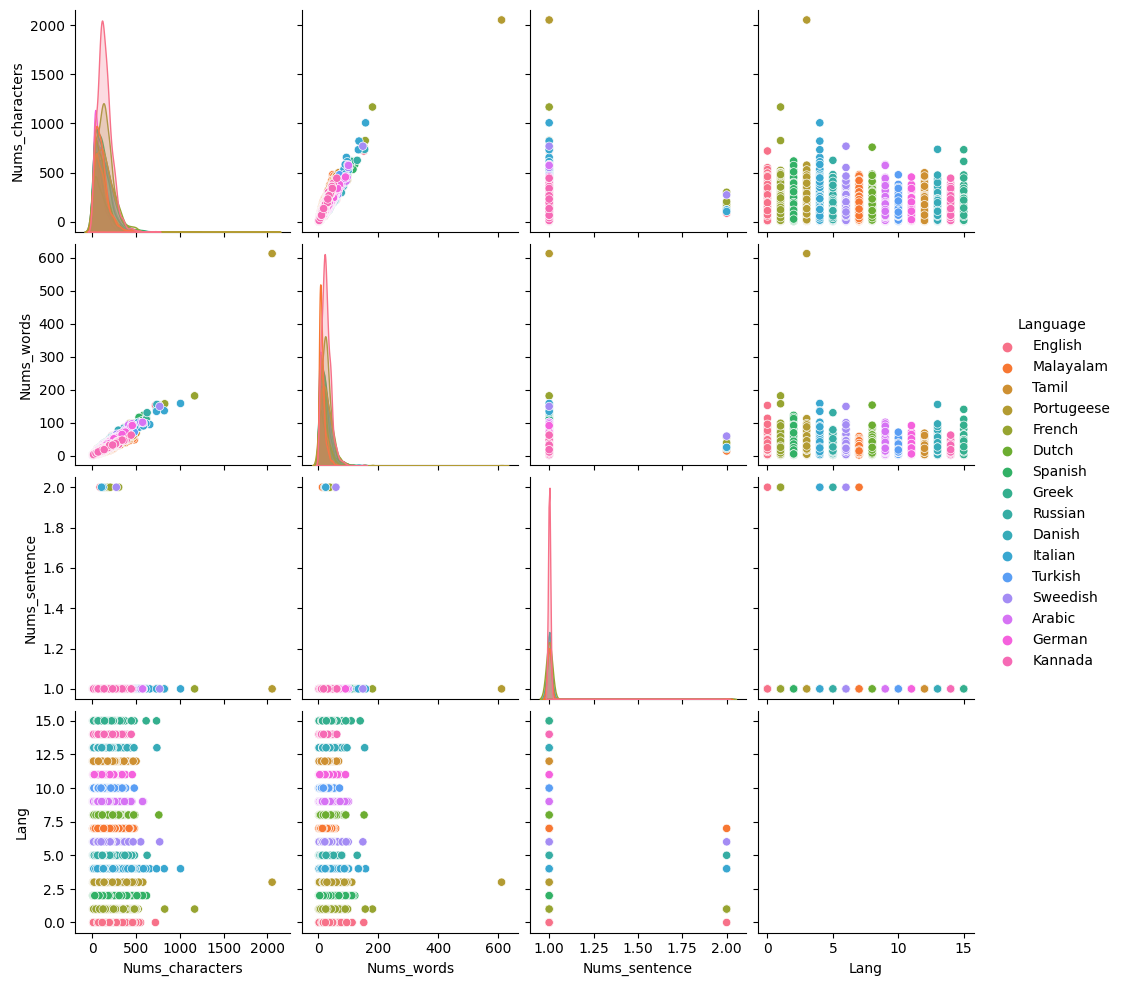

In [192]:
sns.pairplot(df,hue='Language')

In [147]:
#Assigning values to Languages to make it easier for the model to predict and train
lang_dict = {
    'English'   : 0, 
    'French'    : 1, 
    'Spanish'   : 2, 
    'Portugeese': 3, 
    'Italian'   : 4, 
    'Russian'   : 5,
    'Sweedish'  : 6, 
    'Malayalam' : 7, 
    'Dutch'     : 8, 
    'Arabic'    : 9, 
    'Turkish'   : 10, 
    'German'    : 11,
    'Tamil'     : 12, 
    'Danish'    : 13, 
    'Kannada'   : 14, 
    'Greek'     : 15
}

In [148]:
df['Lang'] = df['Language'].apply(lambda x: lang_dict[x])
df.sample(5)

,Text,Language,Nums_characters,Nums_words,Nums_sentence,Lang,Transformed_text
10019,ನಿಮ್ಮ ಸ್ನೇಹಿತರು ನಾನು ತುಂಬಾ ನಿಧಾನವಾಗಿದ್ದೇನೆ.,Kannada,43,6,1,14,ನಿಮ್ಮ ಸ್ನೇಹಿತರು ನಾನು ತುಂಬಾ ನಿಧಾನವಾಗಿದ್ದೇನೆ
3918,mais vous ne pouvez pas acquérir d'expérience ...,French,284,46,1,1,mais vous ne pouvez pas acquérir d'expérience ...
3025,o que significa que leva a pessoa a repetir ma...,Portugeese,57,13,1,3,o que significa leva a pessoa repetir mais uma...
7955,Öğrenciler için bu muazzam kanal olan arkadaşl...,Turkish,269,40,1,10,öğrenciler için bu muazzam kanal olan arkadaşl...
3834,"Dans le cas le plus général, sans étiquette, o...",French,202,36,1,1,dans le cas plus général sans étiquette on che...


In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer() 

In [150]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [151]:
def preprocess(s):
    s = s.lower()
    s = pd.Series(nltk.word_tokenize(s))
    s = s.unique()
    y = []
    for i in s:
        if not(i.isnumeric()) and i not in string.punctuation:
            y.append(i)
    
    s = " ".join(y)
    y.clear()
    return s

In [142]:
print(preprocess("يتلقى نطاق ويكيبيديا الإنجليزية 57% من مجموع ز"))

يتلقى نطاق ويكيبيديا الإنجليزية من مجموع ز


In [152]:
df['Transformed_text'] = df['Text'].apply(lambda x: preprocess(x))

In [144]:
df.head(5)

,Text,Language,Nums_characters,Nums_words,Nums_sentence,Lang,Transformed_text
0,"Nature, in the broadest sense, is the natural...",English,85,18,1,0,nature in the broadest sense is natural physic...
1,"""Nature"" can refer to the phenomena of the phy...",English,87,20,1,0,`` nature '' can refer to the phenomena of phy...
2,"The study of nature is a large, if not the onl...",English,65,17,1,0,the study of nature is a large if not only par...
3,"Although humans are part of nature, human acti...",English,123,21,1,0,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,194,42,1,0,the word nature is borrowed from old french an...


#### Spliting of the data

In [153]:
x = df['Transformed_text'].values
x[45:50]

array(['continents formed then broke up and reformed as the surface of earth reshaped over hundreds millions years occasionally combining to make a supercontinent',
       'roughly million years ago the earliest known supercontinent rodinia began to break apart',
       'the continents later recombined to form pannotia which broke apart about million years ago then finally pangaea',
       'during the neoproterozoic era freezing temperatures covered much of earth in glaciers and ice sheets',
       "this hypothesis has been termed the `` snowball earth '' and it is of particular interest as precedes cambrian explosion in which multicellular life forms began to proliferate about 530–540 million years ago"],
      dtype=object)

In [154]:
y = df['Lang'].ravel()
y

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2,test_size=.01)

In [179]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((10106,), (103,), (10106,), (103,))

# Building Model

In [180]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix 

In [181]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB 
from sklearn.pipeline import make_pipeline
mnb = make_pipeline(TfidfVectorizer(),MultinomialNB())
gnb = make_pipeline(TfidfVectorizer(),GaussianNB())
bnb = make_pipeline(TfidfVectorizer(),BernoulliNB())

Acuraccy :  0.9611650485436893
Precision :  0.9664046848512867


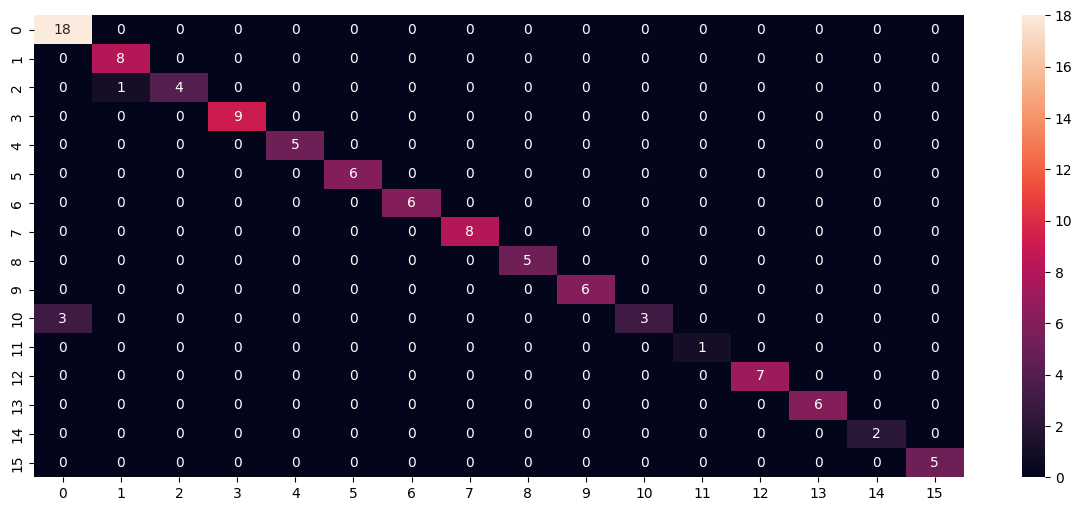

In [182]:
mnb.fit(x_train,y_train)
predict1 = mnb.predict(x_test)
print("Acuraccy : ",accuracy_score(y_test,predict1))
print("Precision : ",precision_score(y_test,predict1,average='weighted'))
a = confusion_matrix(y_test,predict1)
plt.figure(figsize=(15,6))
sns.heatmap(a,annot=True)
plt.show()

Acuraccy :  0.584720861900098
Precision :  0.8914893478433342


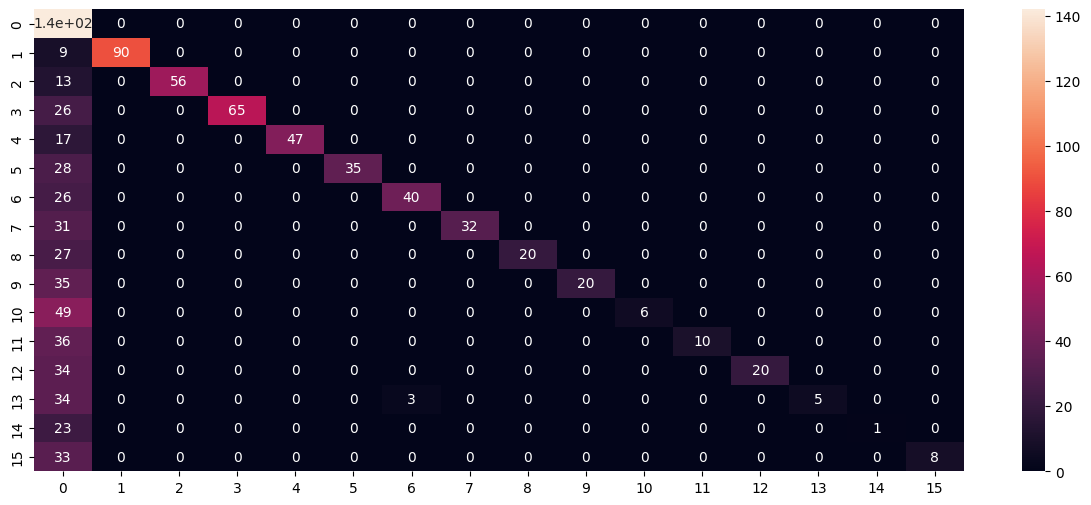

In [160]:
bnb.fit(x_train,y_train)
predict3 = bnb.predict(x_test)
print("Acuraccy : ",accuracy_score(y_test,predict3))
print("Precision : ",precision_score(y_test,predict3,average='weighted'))
a = confusion_matrix(y_test,predict3)
plt.figure(figsize=(15,6))
sns.heatmap(a,annot=True)
plt.show()

In [183]:
def prediction(s):
    s = preprocess(s)
    p = mnb.predict([s])
    return p[0]
    

In [184]:
prediction("Nous n'aimons pas le chocolat")

1

In [185]:
prediction("Jeg er allergisk over for")

13

In [186]:
prediction("Μια μπύρα/έναν καφέ/ένα τσάι/ ένα σφηνάκι, παρακαλώ")

15

In [187]:
prediction("ನಾನು ನಿನ್ನನ್ನು ಕಳೆದುಕೊಳ್ಳುತ್ತೇನೆ")

14

In [188]:
prediction("صباح الخير")

0

In [189]:
prediction("നിങ്ങളെ കണ്ടതിൽ സന്തോഷം")

7

### Pickling 

In [191]:
import pickle

pickle.dump(mnb,open("langpredict.pkl","wb"))